## Exploratory Customer Personality Analysis l: Data Visualization

Customer segmentation is the process of breaking down the total customer base into a variety of distinct subgroups, each of which is made up of clients that have similar requirements and traits. then, businesses may develop specialised marketing plans for every unique consumer niche, ukltimately boosting customer happiness and loyalty.

I found this dataset on [Kaggle](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?select=marketing_campaign.csv), and I believe it may be a nice place to start for a study on consumer segmentation. On the aforementationed Kaggle platform, you may get the definition or description of the attributes.

This reports will devided into two parts, the first of which will concentrate on data visualisation and the second of which will be more focused on cluster analysis and customer ranking. I will using Python to conduct this project. Let's dive in.

## Data import
First, load the required python library packages.

In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
%pwd

'C:\\Users\\Twx0717'

Next, load the downloaded data into python workspace

In [88]:
#Set the working directory to where the data file is located
cust_data = pd.read_csv('marketing_campaign.csv', sep = '\t')

In [4]:
# Set the parameter in pandas
pd.set_option('display.max_row', 30)
pd.set_option('display.max_columns',29)

In [5]:
cust_data.head(30)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   5524        1957  Graduation         Single  58138.0        0         0   
1   2174        1954  Graduation         Single  46344.0        1         1   
2   4141        1965  Graduation       Together  71613.0        0         0   
3   6182        1984  Graduation       Together  26646.0        1         0   
4   5324        1981         PhD        Married  58293.0        1         0   
5   7446        1967      Master       Together  62513.0        0         1   
6    965        1971  Graduation       Divorced  55635.0        0         1   
7   6177        1985         PhD        Married  33454.0        1         0   
8   4855        1974         PhD       Together  30351.0        1         0   
9   5899        1950         PhD       Together   5648.0        1         1   
10  1994        1983  Graduation        Married      NaN        1         0   
11   387        1976       Basic        Married   7500.0        0         0   
12  2125        1959  Graduation       Divorced  63033.0        0         0   
13  8180        1952      Master       Divorced  59354.0        1         1   
14  2569        1987  Graduation        Married  17323.0        0         0   
15  2114        1946         PhD         Single  82800.0        0         0   
16  9736        1980  Graduation        Married  41850.0        1         1   
17  4939        1946  Graduation       Together  37760.0        0         0   
18  6565        1949      Master        Married  76995.0        0         1   
19  2278        1985    2n Cycle         Single  33812.0        1         0   
20  9360        1982  Graduation        Married  37040.0        0         0   
21  5376        1979  Graduation        Married   2447.0        1         0   
22  1993        1949         PhD        Married  58607.0        0         1   
23  4047        1954         PhD        Married  65324.0        0         1   
24  1409        1951  Graduation       Together  40689.0        0         1   
25  7892        1969  Graduation         Single  18589.0        0         0   
26  2404        1976  Graduation        Married  53359.0        1         1   
27  5255        1986  Graduation         Single      NaN        1         0   
28  9422        1989  Graduation        Married  38360.0        1         0   
29  1966        1965         PhD        Married  84618.0        0         0   

   Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0   04-09-2012       58       635         88              546   
1   08-03-2014       38        11          1                6   
2   21-08-2013       26       426         49              127   
3   10-02-2014       26        11          4               20   
4   19-01-2014       94       173         43              118   
5   09-09-2013       16       520         42               98   
6   13-11-2012       34       235         65              164   
7   08-05-2013       32        76         10               56   
8   06-06-2013       19        14          0               24   
9   13-03-2014       68        28          0                6   
10  15-11-2013       11         5          5                6   
11  13-11-2012       59         6         16               11   
12  15-11-2013       82       194         61              480   
13  15-11-2013       53       233          2               53   
14  10-10-2012       38         3         14               17   
15  24-11-2012       23      1006         22              115   
16  24-12-2012       51        53          5               19   
17  31-08-2012       20        84          5               38   
18  28-03-2013       91      1012         80              498   
19  03-11-2012       86         4         17               19   
20  08-08-2012       41        86          2               73   
21  06-01-2013       42         1          1             1725   
22  23-12-2012       63       867          0               86

In [6]:
cust_data.shape

(2240, 29)

In [7]:
cust_data.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean         37.525446         27.062946     44.021875           2.325000   
std          54.628979         41.280498     52.167439           1.932238   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2240.000000          2240.000000        2240.000000   
mean          4.084821             2.662054           5.790179   
std           2.778714             2.923101           3.250958   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count   2240.000000   2240.000000  2240.000000         2240.0     2240.0   
mean       0.064286      0.013393     0.009375            3.0       11.0   
std        0.245316      0.114976     0.096391            0.0        0.0   
min        0.000000      0.000000     0.000000            3.0       11.0   
25%        0.000000      0.000000     0.000000            3.0       11.0   
50%        0.000000      0.000000     0.000000            3.0       11.0   
75%        0.000000      0.000000     0.000000            3.0       11.0   
max        1.000000      1.000000     1.000000            3.0       11.0   

          Response  
count  2240.000000  
mean      0.149107  
std       0.356274  
min       0.000000  
25%       0.000000  
50%   

In [8]:
#showing the variables with zero variance 
print(cust_data.var()==0)

ID                     False
Year_Birth             False
Income                 False
Kidhome                False
Teenhome               False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact           True
Z_Revenue               True
Response               False
dtype: bool



#### There are total of 2240 rows (entries) which is from 0 to 2239 and 29 (columns) as shown in the output below. Each row corresponds to a customer.


In [9]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [10]:
#calculate total numble of isnull variables:
#a total of 24 customers do not  have their yearly income recorded on the data
cust_data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [11]:
#show a bar chart to show clearly the missing values
missing_v = cust_data.isna().sum().to_dict()
missing_v_df = pd.DataFrame(list(missing_v.items()),columns=['Column', 'missing_v'])
fig = px.bar(missing_v_df, x='Column', y='missing_v', template='plotly_dark', title='Missing Values')
fig.show()

#### There are total of 2240 rows (entries) which is from 0 to 2239 and 24 (columns) as shown in the output above are missing values in `Income` feature. Each row corresponds to a customer.

In [12]:
# Calculating the missing Values % contribution in DF
perc_missing = round(100*cust_data['Income'].isnull().sum()/len(cust_data), 2)
print(f"The percentage of missingness is {perc_missing}%")

The percentage of missingness is 1.07%


Based on the `var()` and `isnull().sum()` function, there are a few interesting things to take note:
* There are `NA'S` (Missing Values) in the `Income` feature.
* Most of the numerical features portrayed positive skewness.
* Feature like `ID` is probably not useful as it does not encode any information about a customer. I will keep it in the `DataFrame` but not gonna use it for any subsequent analysis.
* Feature like `Z_CostContact` and  `Z_Revenue` are not useful attributes as they have zero variance in `var()`.
* Some feature enginnering is required for feature like `Dt_Customer` and as they are not stored in the correct data types. this will be performed in the subsection below. `Year_Birth` can be transformed into more intuitive attribute like **age** of customer.
* Feature restructuring from `character`to `factor` for features such as `Education` and `Marital Status`. 

## Feature Engineering

### Removal of zero variance variables

### Drop the zero variance feature like `Z_CostContact` and `Z_Revenue`

In [13]:
#To see the number of unique values 
cust_data.nunique(axis = 0)

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [14]:
num_col_names = cust_data.select_dtypes([np.number]).columns.values
drop_col = num_col_names[cust_data.var()==0]

In [15]:
cust_data_preprocessed = cust_data.copy()

#Discard columns with zero variance
cust_data_preprocessed.drop(drop_col, axis = 1, inplace = True)

In [16]:
# show the results with no zero variance features
cust_data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i


### Get rid of invalid observations


In [17]:
#Tabulate the frequency of each marital status category
mar = pd.DataFrame(cust_data['Marital_Status'].value_counts()).reset_index()
# pd.crosstab(index=cust_data["Marital_Status", "Count"]
mar.columns = ['Marital_Status', 'Count']
mar

Marital_Status  Count
0        Married    864
1       Together    580
2         Single    480
3       Divorced    232
4          Widow     77
5          Alone      3
6         Absurd      2
7           YOLO      2


### Feature extraction I
1. Derive the minimum numbers of household members from attributes `Marital_Status`, `Kidhome`, `Teenhome`.
2. Compute the total number of accepted offers by summing up the `Response` and five of the `AcceptedCmp` features.


In [18]:
cust_data.groupby(['Marital_Status'])[['Kidhome', 'Teenhome']].min()

Kidhome  Teenhome
Marital_Status                   
Absurd                0         0
Alone                 1         0
Divorced              0         0
Married               0         0
Single                0         0
Together              0         0
Widow                 0         0
YOLO                  0         1

In [19]:
#Calculate the total number of household member(Marital_Status, Teenhome, Kidhome)
cust_data['min_household'] = (cust_data["Kidhome"].min() + cust_data["Teenhome"].min() + cust_data['Marital_Status'].value_counts().min())

# cust_data.append(tot_AcceptedCmp = lambda x:
#                 x.groupby([['AcceptedCmp1' + 'AcceptedCmp2' + 'AcceptedCmp3' + 'AcceptedCmp4' + 'AcceptedCmp5' + 'Response']]))

In [20]:
#Gather all the AcceptedCmps and response in one features
cust_data['tot_AcceptedCmp'] = cust_data['AcceptedCmp1'] + cust_data['AcceptedCmp2'] + cust_data['AcceptedCmp3'] + cust_data['AcceptedCmp4'] + cust_data['AcceptedCmp5'] + cust_data['Response']

## Restructuring of data types

In [21]:
cust_data['Dt_Customer'].unique()

array(['04-09-2012', '08-03-2014', '21-08-2013', '10-02-2014',
       '19-01-2014', '09-09-2013', '13-11-2012', '08-05-2013',
       '06-06-2013', '13-03-2014', '15-11-2013', '10-10-2012',
       '24-11-2012', '24-12-2012', '31-08-2012', '28-03-2013',
       '03-11-2012', '08-08-2012', '06-01-2013', '23-12-2012',
       '11-01-2014', '18-03-2013', '02-01-2013', '27-05-2013',
       '20-02-2013', '31-05-2013', '22-11-2013', '22-05-2014',
       '11-05-2013', '29-10-2012', '29-08-2013', '31-12-2013',
       '02-09-2013', '11-02-2014', '01-02-2013', '29-04-2013',
       '12-03-2013', '05-11-2013', '02-10-2013', '28-06-2014',
       '09-11-2012', '24-05-2013', '01-01-2014', '08-11-2012',
       '12-05-2014', '11-08-2012', '07-06-2014', '12-06-2013',
       '19-11-2012', '02-04-2013', '28-04-2014', '17-06-2013',
       '03-03-2014', '04-07-2013', '07-09-2012', '18-02-2013',
       '11-06-2013', '06-12-2013', '21-05-2013', '11-05-2014',
       '19-03-2014', '27-09-2013', '08-04-2013', '11-09

In [22]:
print('Columns with string datatype are:')
for col in cust_data.columns:
    if cust_data[col].dtypes == object:
        print(col)

Columns with string datatype are:
Education
Marital_Status
Dt_Customer


In [23]:
edu = pd.DataFrame(cust_data['Education'].value_counts()).reset_index()
edu.columns = ['Education', 'Count']

In [24]:
cust_data['Education'] = np.where(cust_data['Education'] == '2n Cycle', 'Master', cust_data['Education'])

In [25]:
edu = pd.DataFrame(cust_data['Education'].value_counts()).reset_index()
edu.columns = ['Education', 'Count']
fig = px.bar(edu, x='Education', y='Count', color='Education')
fig.update_layout(width=800, height=400, title='Education ')
fig.show()

In [26]:
# Change the data from string to date format
pd.to_datetime(cust_data['Dt_Customer'], format='%d-%m-%Y')

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [27]:
#get catogorical variables
c = (cust_data.dtypes == 'object')
c_object = list(c[c].index)
print('The categorical features are:', c_object)

The categorical features are: ['Education', 'Marital_Status', 'Dt_Customer']


In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in c_object:
    cust_data[i] = cust_data[[i]].apply(le.fit_transform)
print('All features are numerical now')

All features are numerical now


In [29]:
#drop and scale data
df = cust_data.copy()
feature_del = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']
df = df.drop(feature_del, axis=1)

#scaling for modeling purpose
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
s_df = pd.DataFrame(scaler.transform(df), columns = df.columns)
print('All features are scaled now')


All features are scaled now


## Feature extraction II

Change the attribute `Year_Birth` to age and change the `Dt_Customer` to number of days a customer is enrolled with the company.

In [78]:
from datetime import datetime

In [79]:
# shows the date of previous and lastest recorded

Date = pd.to_datetime(cust_data['Dt_Customer'])

print('The date record of latest customers :', Date.max())
print('The date record of oldest customers :', Date.min())

The date record of latest customers : 2014-12-06 00:00:00
The date record of oldest customers : 2012-01-08 00:00:00


In [80]:
Date

0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [81]:
cust_data['Dt_Customer'].dtypes

dtype('O')

In [82]:
#Change Dt_customer to days of enrollment. 
#Assume that the current date is 1st July 2014
import datetime as dt
current_date = datetime.strptime('2014-12-8', '%Y-%m-%d')
cust_data['days_enrolled'] = current_date - Date

In [83]:
cust_data['days_enrolled'].head()

0   973 days
1   127 days
2   474 days
3    67 days
4   323 days
Name: days_enrolled, dtype: timedelta64[ns]

Lets assume that the data was collected in 2014 since the newest record was in 2014-12-06

In [84]:
#age of customer today
cust_data['Age'] = 2014 - cust_data.Year_Birth

cust_data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  ...  NumCatalogPurchases  NumStorePurchases  \
0                88  ...                   10                  4   
1                 1  ...                    1                  2   
2                21  ...                    2                 10   
3                 3  ...                    0                  4   
4                27  ...                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  days_enrolled  \
0             0         0              3         11         1       973 days   
1             0         0              3         11         0       127 days   
2             0         0              3         11         0       474 days   
3             0         0              3         11         0        67 days   
4             0         0              3         11         0       323 days   

   Age  
0   57  
1   60  
2   49  
3   30  
4   33  

[5 rows x 31 columns]

In [89]:

#total spendings
cust_data['Spent'] = cust_data['MntWines'] + cust_data['MntFruits'] + cust_data['MntMeatProducts'] + cust_data['MntFishProducts'] + cust_data['MntSweetProducts'] + cust_data['MntGoldProds']

#living_with, Child, family size
cust_data['Living_with'] = cust_data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
cust_data['Child'] = cust_data['Kidhome'] + cust_data['Teenhome']
cust_data['Familysize'] = cust_data['Living_with'].replace({'Alone': 1, 'Partner' : 2}) + cust_data['Child']

#for more tidy
cust_data = cust_data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})
cust_data['Product'] = cust_data['Wines'] + cust_data['Fruits'] + cust_data['Meat'] + cust_data['Fish'] + cust_data['Sweets'] + cust_data['Gold']
#remove features not used
toDrop = ["Dt_Customer", "Year_Birth", "ID"] 
cust_data = cust_data.drop(toDrop, axis=1)

### Get rid of outliers

- Remove equal to or more than 100 years old customers.
- Discard instance with `Income` more than 10 times the median of `Income`, Marketing department might need to devise exclusive marketing strategy on this customer.
- It will be proven below the insights

Text(0, 0.5, 'Age')

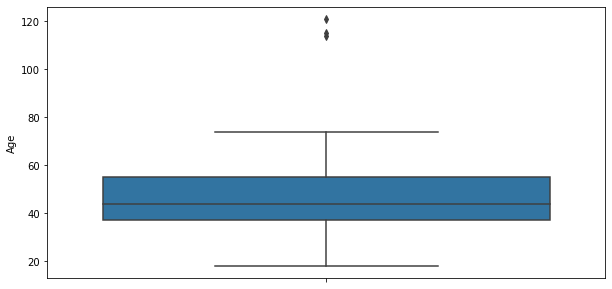

In [38]:
#Age outlier
plt.figure(figsize=(10,5))
sns.boxplot(y = cust_data.Age)
plt.ylabel('Age')

Text(0, 0.5, 'Income')

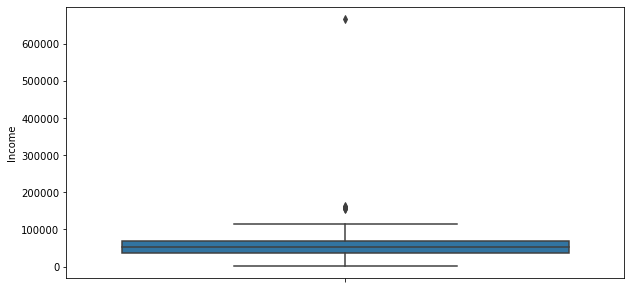

In [39]:
#Income outlier
plt.figure(figsize=(10,5))
sns.boxplot(y=cust_data.Income)
plt.ylabel('Income')

In [40]:
#Checking the outlier number 
print('Number of customers who was above 100 years old:' , len(cust_data[cust_data['Age'] > 100]))
print('Number of customers who earn total of invome which over 600000:' , len(cust_data[cust_data['Income'] > 600000]))

Number of customers who was above 100 years old: 3
Number of customers who earn total of invome which over 600000: 1


### Insights:
1. At the `Age` feature, there were two shaded dots appears above 100 and it was imposible if assume a human total living years is 100 years old 
2. At the `Income` feature, there are some customers earns more than 150000 and few even more than 600000.
3. Thus, lets drop those data with imposible features 


In [41]:
#filter out age >= 100
cust_data = cust_data[(cust_data['Age']<100)]

#Unusually high Income
#Assume a customer's Income not more than 600000 since the outlier show untill 600000
cust_data = cust_data[(cust_data['Income']<600000)]

#show the total length of data after dropping
print('The total number of data after removing the outliers are:', len(cust_data))

The total number of data after removing the outliers are: 2212


### Missing values imputation
There are primarily two ways to deal with missing values:

1. Complete case analysis (drop observation(s) with missing values).
2. Imputation.
* Single imputation.
* Multiple imputation.

In [42]:
for col in cust_data.columns:
    if cust_data[col].isnull().sum() > 0:
        print(f"Column '{col}' has {cust_data[col].isnull().sum()} missing values")
        

In [43]:
# cust_data['Income'] = cust_data['Income'].fillna(cust_data.groupby('Education')['Income'].transform('mean'))
# count = 0
# for col in cust_data.columns:
#     print(f"Columns '{col}' has {cust_data[col].isnull().sum()} missing values")
#     count = 1
# if not count:
#     print('No missing values are present in the customer data')

In [44]:
# missing value check -Boolean
cust_data.isnull().any()

Education         False
Marital_Status    False
Income            False
Kidhome           False
Teenhome          False
                  ...  
Age               False
Spent             False
Living_with       False
Child             False
Familysize        False
Length: 34, dtype: bool

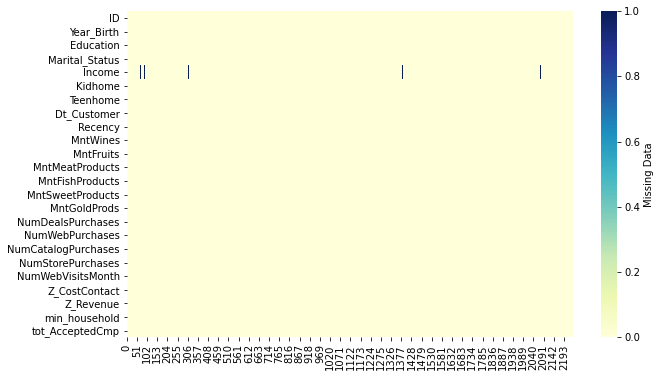

In [45]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)


In [46]:
# # To make graphical analysis on missing values
# pip install missingno

<AxesSubplot:>

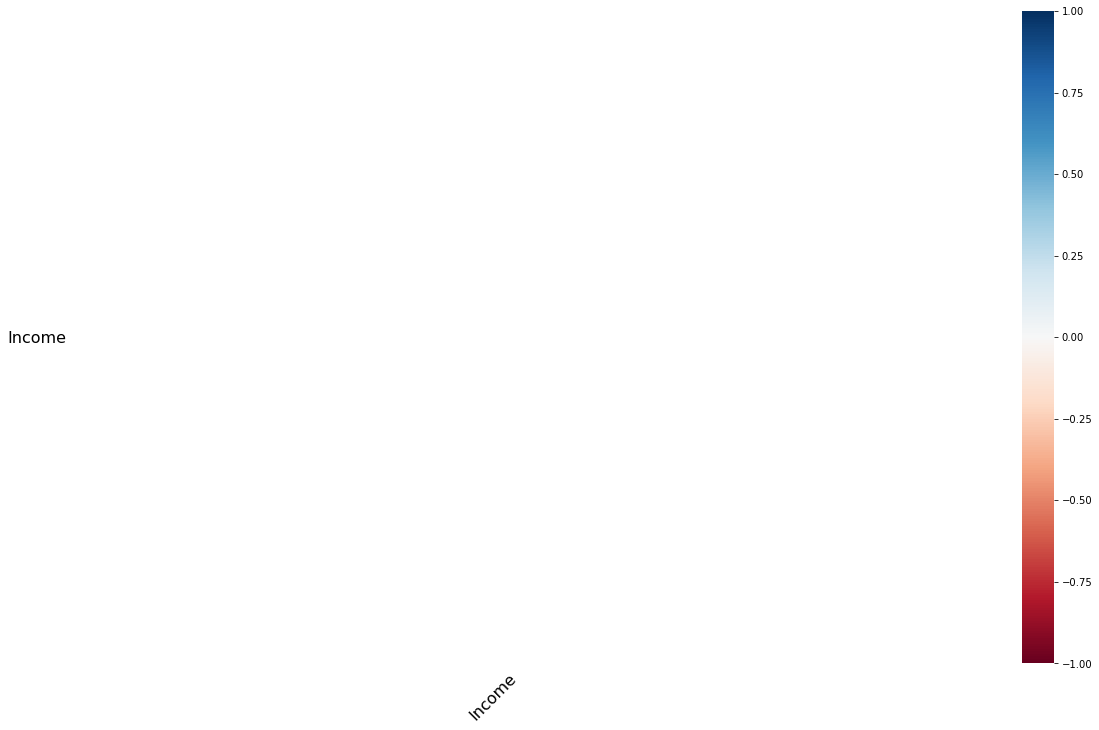

In [47]:
# Heatmap to show more clearly the missing values
import missingno as msnum
msnum.heatmap(df)

***The Heatmap above gives a quick overview of completeness dataset and it only shows `Income` feature and it was the only one missing feature and it also shows that there are no strong correlations between missing values in the feature***

### Visualizing the location of missing value
***The `msnum.matrix()` used to lets viewers quickly visually pick out oatterns in data completion***

<AxesSubplot:>

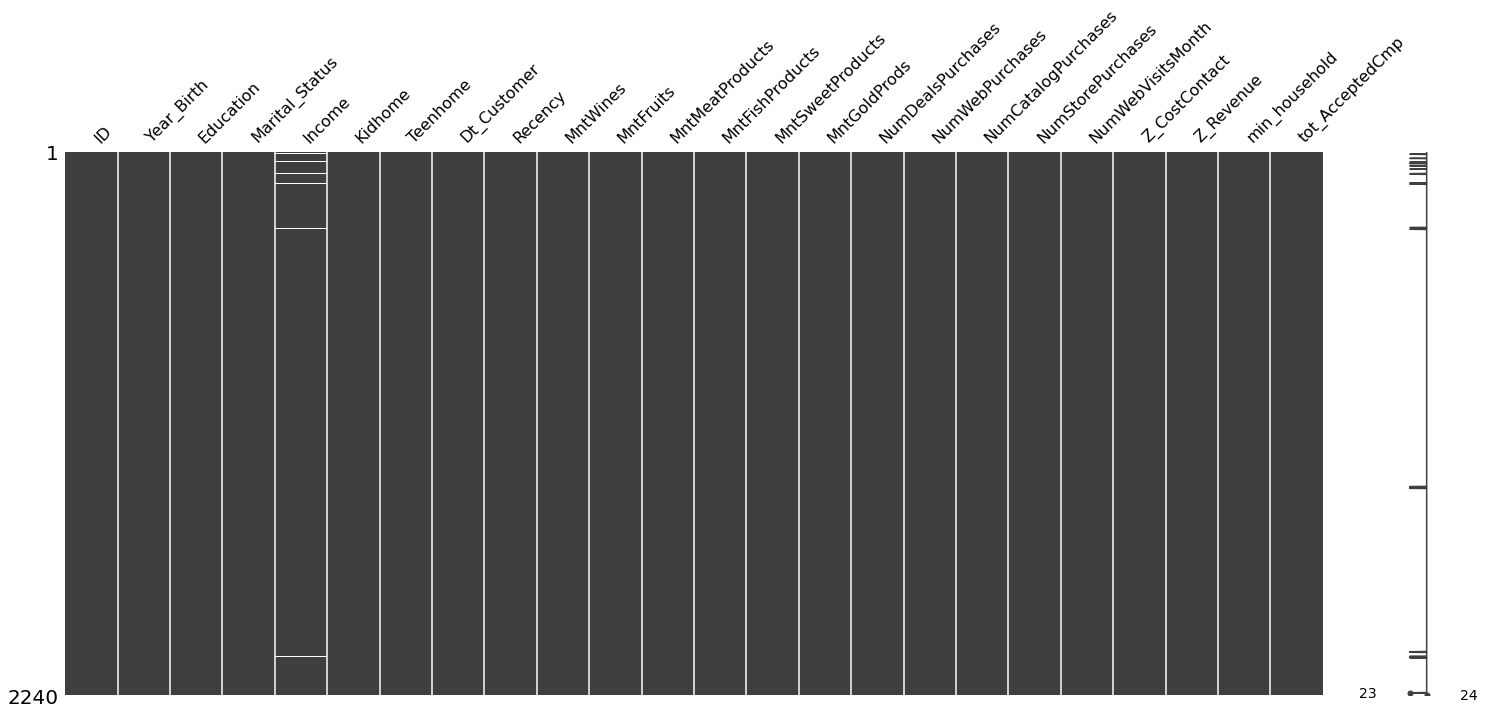

In [48]:
msnum.matrix(df)

## MICE Imputation
***The IterativeImputer (MICE) performns multiple regressions over random sample ofthe data, then takes the average ofthe multiple regression values and uses that value to impute the missing value.***

### Why use MICE?
***One type of imputation algorithm is univariate, which imputes values in the i-th feature dimension using only non-missing values in that feature dimension (e.g. impute.SimpleImputer). By contrast, multivariate imputation algorithms use the entire set of available feature dimensions to estimate the missing values (e.g. impute.IterativeImputer).***

In [49]:
# mice
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
df_mice = df.copy(deep=True)

mice_imputer = IterativeImputer()
df['Income'] = mice_imputer.fit_transform(df[['Income']])

In [50]:
df['Income'].isnull().sum()

0

In [51]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

In [52]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   Education            2212 non-null   int32          
 1   Marital_Status       2212 non-null   int32          
 2   Income               2212 non-null   float64        
 3   Kidhome              2212 non-null   int64          
 4   Teenhome             2212 non-null   int64          
 5   Recency              2212 non-null   int64          
 6   Wines                2212 non-null   int64          
 7   Fruits               2212 non-null   int64          
 8   Meat                 2212 non-null   int64          
 9   Fish                 2212 non-null   int64          
 10  Sweets               2212 non-null   int64          
 11  Gold                 2212 non-null   int64          
 12  NumDealsPurchases    2212 non-null   int64          
 13  NumWebPurchases   

In [53]:
cust_data["days_enrolled"] = np.int32(cust_data["days_enrolled"])

In [54]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   int32  
 1   Marital_Status       2212 non-null   int32  
 2   Income               2212 non-null   float64
 3   Kidhome              2212 non-null   int64  
 4   Teenhome             2212 non-null   int64  
 5   Recency              2212 non-null   int64  
 6   Wines                2212 non-null   int64  
 7   Fruits               2212 non-null   int64  
 8   Meat                 2212 non-null   int64  
 9   Fish                 2212 non-null   int64  
 10  Sweets               2212 non-null   int64  
 11  Gold                 2212 non-null   int64  
 12  NumDealsPurchases    2212 non-null   int64  
 13  NumWebPurchases      2212 non-null   int64  
 14  NumCatalogPurchases  2212 non-null   int64  
 15  NumStorePurchases    2212 non-null   i

In [55]:
lr = LinearRegression()
imp = IterativeImputer(estimator=lr, random_state=0)
X = imp.fit_transform(cust_data.to_numpy())

In [56]:
df_cust_data = pd.DataFrame(X, columns = cust_data.columns)

In [57]:
df_cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212 entries, 0 to 2211
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   float64
 1   Marital_Status       2212 non-null   float64
 2   Income               2212 non-null   float64
 3   Kidhome              2212 non-null   float64
 4   Teenhome             2212 non-null   float64
 5   Recency              2212 non-null   float64
 6   Wines                2212 non-null   float64
 7   Fruits               2212 non-null   float64
 8   Meat                 2212 non-null   float64
 9   Fish                 2212 non-null   float64
 10  Sweets               2212 non-null   float64
 11  Gold                 2212 non-null   float64
 12  NumDealsPurchases    2212 non-null   float64
 13  NumWebPurchases      2212 non-null   float64
 14  NumCatalogPurchases  2212 non-null   float64
 15  NumStorePurchases    2212 non-null   f

 The income now has no missing value as shown above.

## Data Visualization

Suppose there are one of the data scientist dealing with this dataset and the superior raised a few questions as below:

1. How are the `Income` attribute distributed among the customers?

2. What are the relationship between the numerical features? Is there any interesting data pattern or correlation worth noting, which can provide useful insight?

3. What are the relationship among the categorical features? (e.g. how the rate of `Response`(accepted the offer in the last campaign) varies with the presence of children and teenagers in the household?)

4. What are the relationship between categorical and numerical features? (e.g. what is the distribution of the amount spent on different merchandise under different educational background?)

All the listed questions above can be answered by leveraging appropriate set of data visualization tools. 

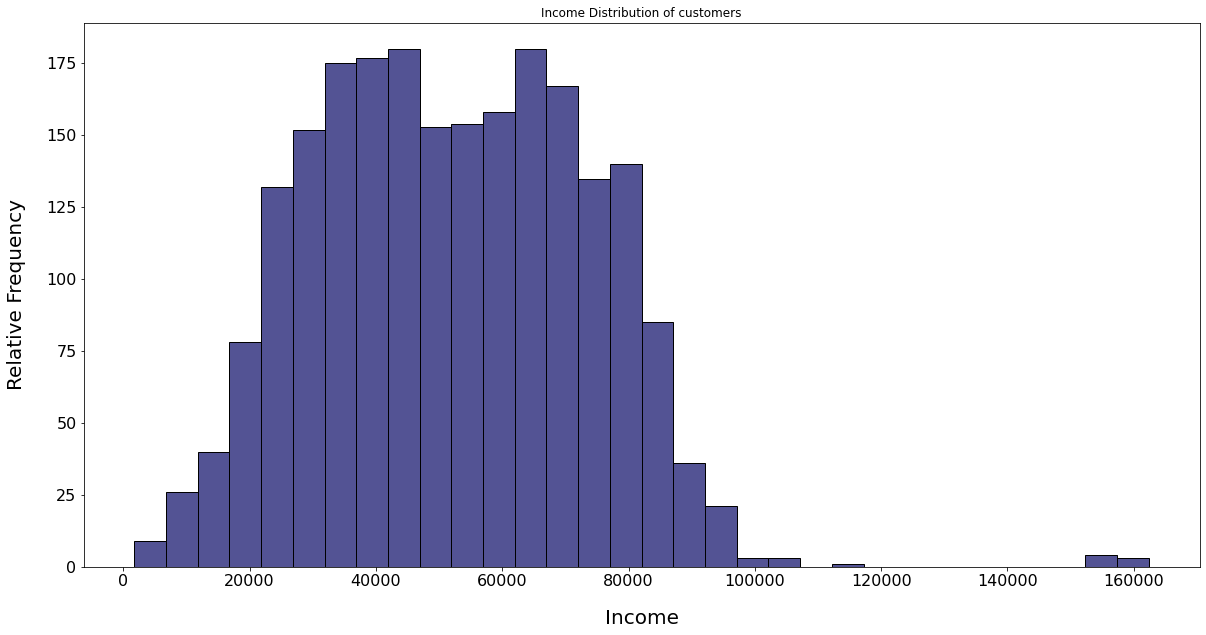

In [58]:
# Income distribution of customers
plt.figure(figsize=(20,10))
ax = sns.histplot(df_cust_data["Income"], color="midnightblue")
ax.set(title = "Income Distribution of customers");
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Relative Frequency', fontsize=20, labelpad=20);

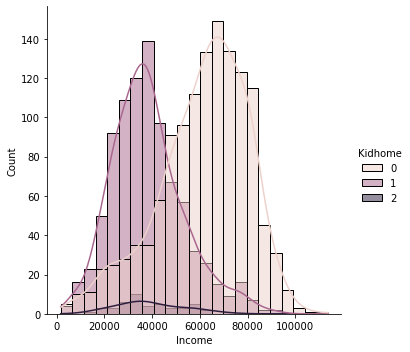

In [59]:
#Income distribution of Kidhome
df = cust_data[cust_data['Income']<130000]
sns.displot(data = df, x = "Income", hue = "Kidhome", kde = True)

Above histogram shows the families with no kid have the highest income while the families with two kids as it have the lowest income

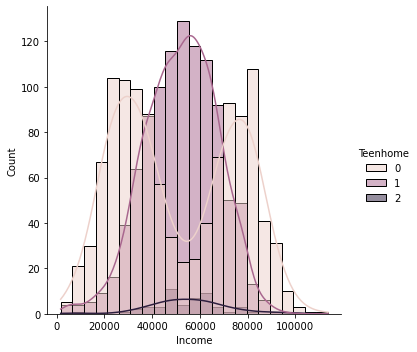

In [60]:
#Income distribution of Teenhome
sns.displot(data = df, x = 'Income', hue = 'Teenhome', kde = True)

Above data shows the families with one teen have the highest income, families with two teens have the lowest income and the families with zero teen distribute in to two groups which is around 20000 - 50000 and 60000 - 100000

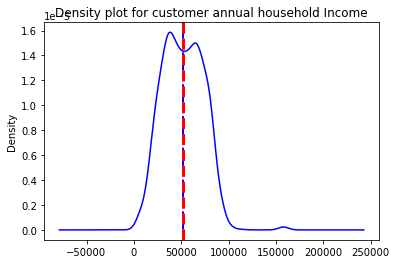

In [61]:
#Density plot
cust_data['Income'].plot.density(color='blue')
plt.axvline(x=cust_data['Income'].mean(), color='blue', linestyle='--', linewidth=2)
plt.axvline(x=cust_data['Income'].median(), color='red', linestyle='--', linewidth=3)
plt.title('Density plot for customer annual household Income')
plt.show()

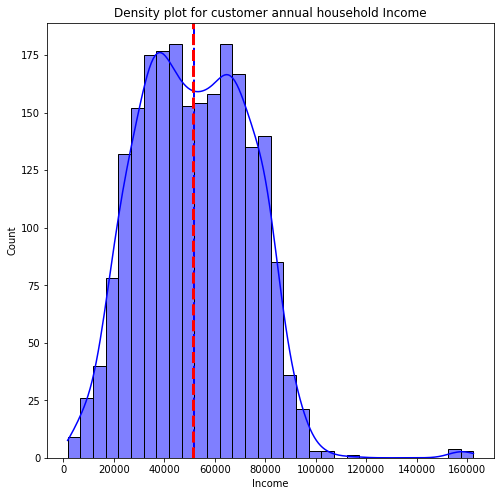

In [62]:
plt.figure(figsize=(8,8))
sns.histplot(cust_data["Income"],color = 'blue',kde=True)
plt.axvline(x=cust_data['Income'].mean(), color='blue', linestyle='--', linewidth=2)
plt.axvline(x=cust_data['Income'].median(), color='red', linestyle='--', linewidth=3)
plt.title('Density plot for customer annual household Income')
plt.xlabel('Income')
plt.show()

Most of the customers (99.5%) have income of equal or less than 100k. In fact, (90.91%) of the customers have annual household income within 20k - 90k. There is a heavy right tail for both the histogram and density plot, indicating customer with relatively high annual household income (There are 7 customers with `Income` more than 150k.

In [63]:
cust_data.head()

Education  Marital_Status   Income  Kidhome  Teenhome  Recency  Wines  \
0          1               4  58138.0        0         0       58    635   
1          1               4  46344.0        1         1       38     11   
2          1               5  71613.0        0         0       26    426   
3          1               5  26646.0        1         0       26     11   
4          3               3  58293.0        1         0       94    173   

   Fruits  Meat  Fish  Sweets  Gold  NumDealsPurchases  NumWebPurchases  ...  \
0      88   546   172      88    88                  3                8  ...   
1       1     6     2       1     6                  2                1  ...   
2      49   127   111      21    42                  1                8  ...   
3       4    20    10       3     5                  2                2  ...   
4      43   118    46      27    15                  5                5  ...   

   AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
0             0             0         0              3         11         1   
1             0             0         0              3         11         0   
2             0             0         0              3         11         0   
3             0             0         0              3         11         0   
4             0             0         0              3         11         0   

   min_household  tot_AcceptedCmp  days_enrolled  Age  Spent  Living_with  \
0              2                1    -1532756048   57   1617            4   
1              2                0    -1532756125   60     27            4   
2              2                0    -1532756412   49    776            5   
3              2                0    -1532756167   30     53            5   
4              2                0    -1532756358   33    422            3   

   Child  Familysize  
0      0           4  
1      2           6  
2      0           5  
3      1           6  
4      1           4  

[5 rows x 34 columns]

correlogram for different merchandise


<Figure size 432x288 with 0 Axes>

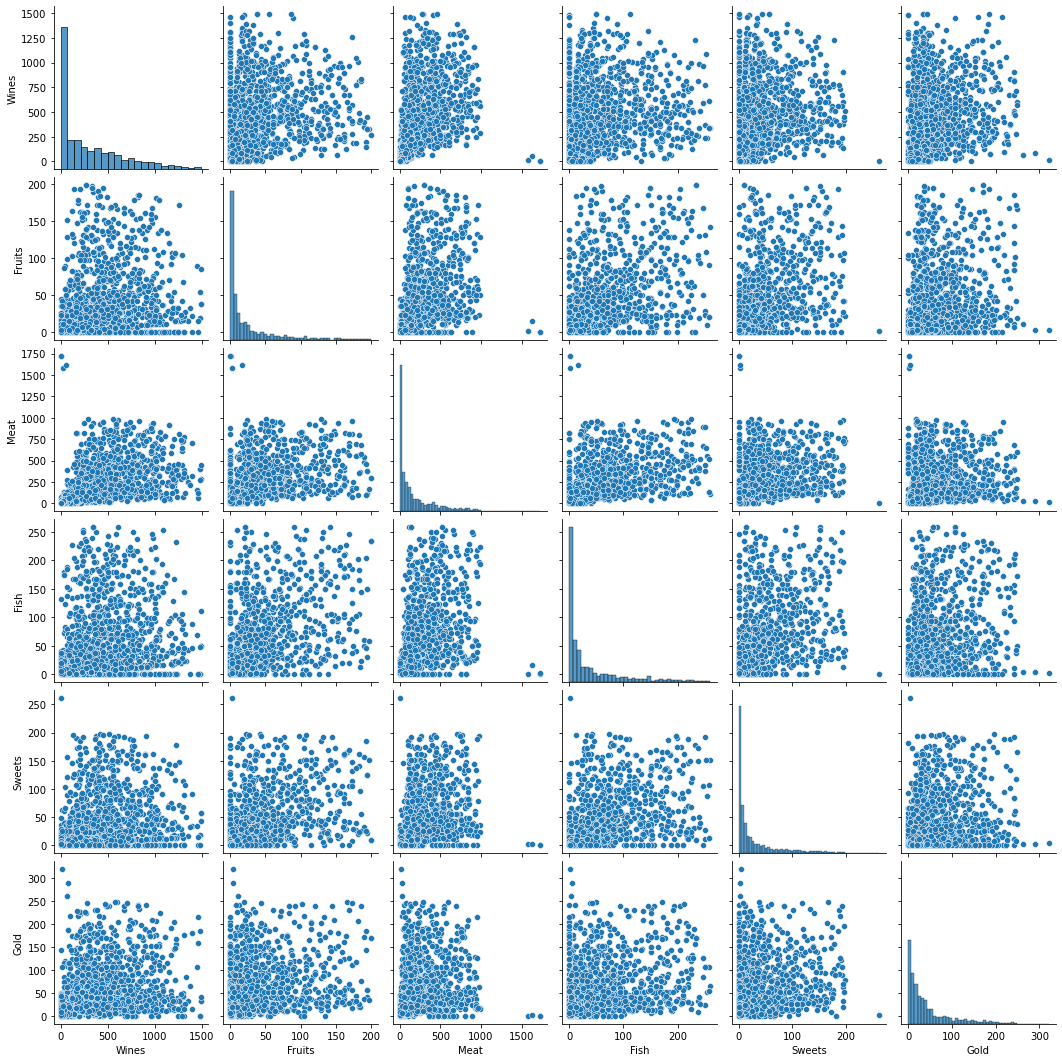

Text(0.5, 1.0, 'Scatter plot matrix + correlations for products-related features set.')

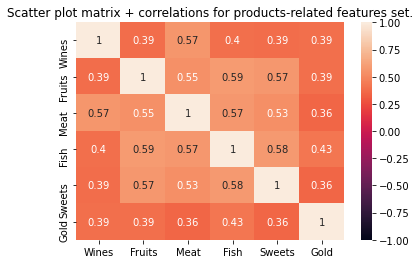

In [64]:
#scatter plot for matrix for amount spent on different merchandise
To_Plot = ["Wines",'Fruits','Meat', 'Fish', 'Sweets', 'Gold']
print('correlogram for different merchandise')
plt.figure()
sns.pairplot(cust_data[To_Plot])
plt.show()

#Correlation matrix/correlogram of products-related features set
To_Plot = ["Wines",'Fruits','Meat', 'Fish', 'Sweets', 'Gold']
ax = sns.heatmap(cust_data[To_Plot].corr(), vmin=-1, vmax=1, annot=True)
ax.set_title('Scatter plot matrix + correlations for products-related features set.')

correlogram for number of pruchases


<Figure size 1080x576 with 0 Axes>

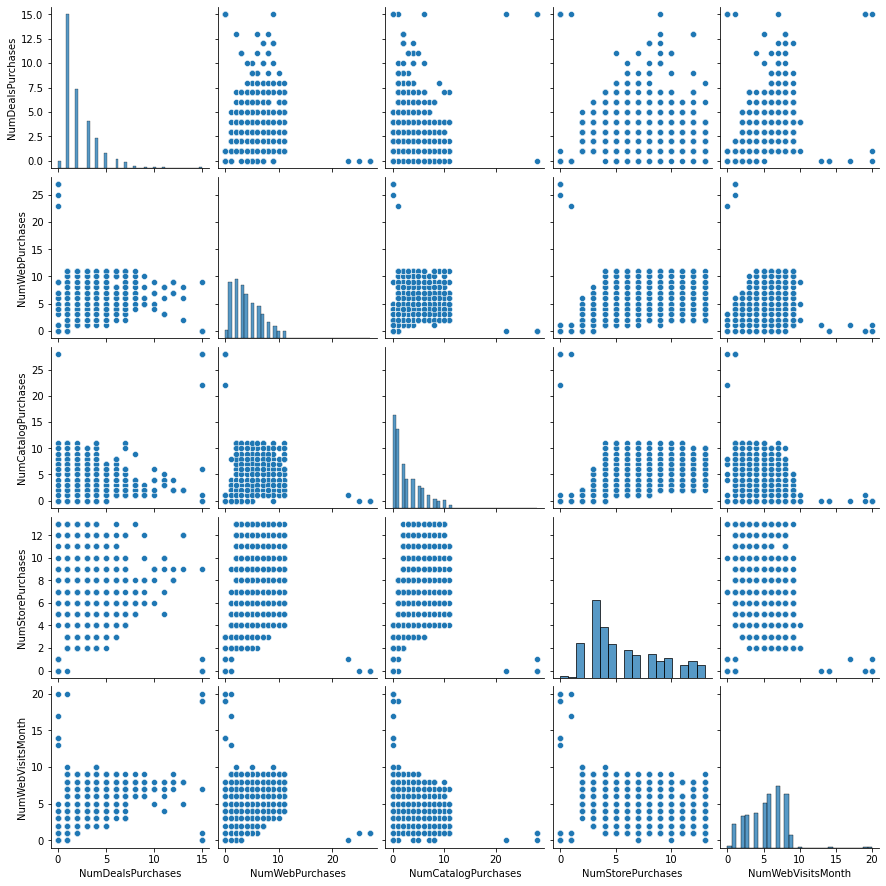

Text(0.5, 1.0, 'Scatter plot matrix + correlations for “purchase behavior” features set')

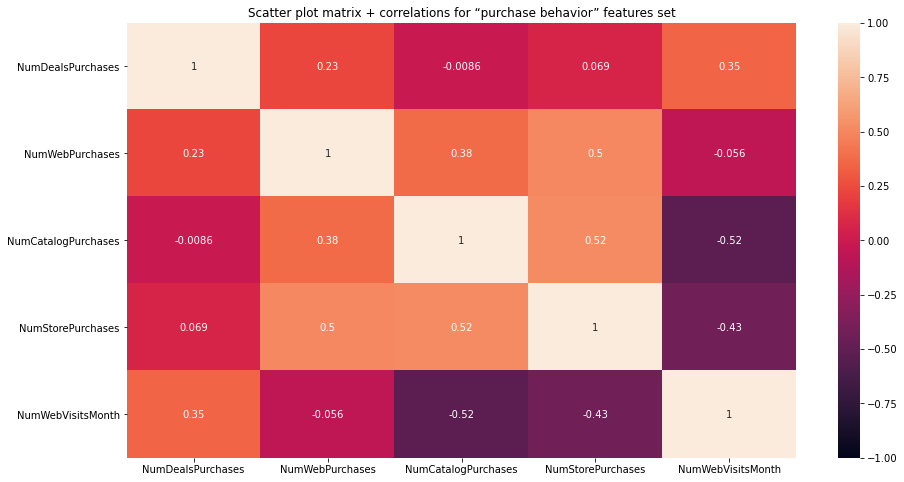

In [110]:
###### scatter plots matrix for number of purchases.
pur_plot = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
print('correlogram for number of pruchases')
plt.figure()
sns.pairplot(cust_data[pur_plot])
plt.show()

#Correlation matrix/correlogram of “purchase behavior” features set
pur_plot = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
au = sns.heatmap(cust_data[pur_plot].corr(), vmin=-1, vmax=1, annot=True)
au.set_title('Scatter plot matrix + correlations for “purchase behavior” features set')

Some useful information that we can quickly grasp from the above plots are:

1. The amount spent on different pairs of product types are *possitively linear correlated*.
2. Positive correlation between `NumDealsPurchases` and `NumWebVisitsMonth`. This may be attributed to the fact that customer get the incoming discount offer information by visiting the company website last month.
3. Negative correlation between `NumWebVisitsMonth` and `NumStorePurchases`. Customers who prefer to buy directly in stores visit the company website less frequently.
Lastly, the correlation matrix for all numerical attributes including the derived features discussed in the feature engineering subsection are as shown in below:

Text(0.5, 1.0, 'Correlation')

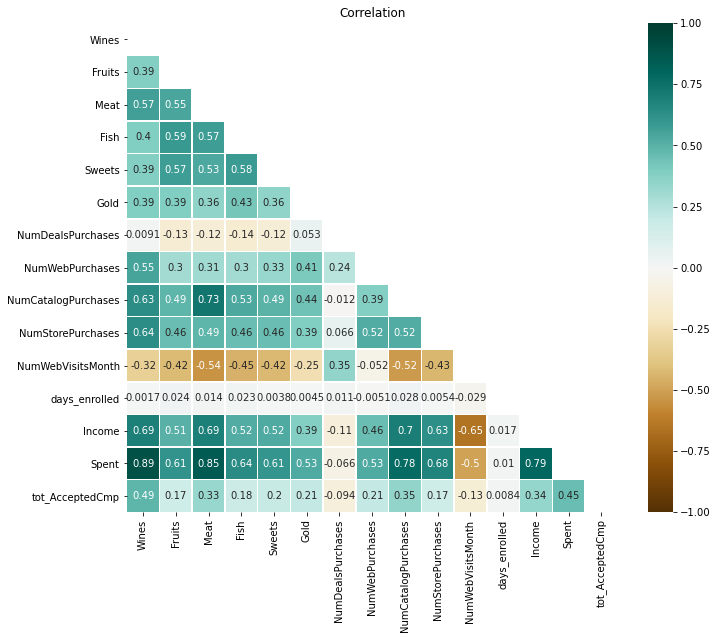

In [66]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
seq = ["Wines",'Fruits','Meat', 'Fish', 'Sweets', 'Gold','NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'days_enrolled', 'Income', 'Spent', 'tot_AcceptedCmp']

# mask = np.triu(np.ones_like(cust_data[seq].corr(), dtype=bool))
mask = np.triu(cust_data[seq].corr())
heatmap = sns.heatmap(cust_data[seq].corr(), mask=mask, vmin=-1, vmax=1, annot=True,
                       cmap='BrBG', linewidth=.5)
heatmap.set_title('Correlation')

The strong positive linear correlation (0.73) of `Meat` and `NumCataloguePurchases` (row 3, column 9) may suggest that large amount of spending made through catalogue are on meat product, compated to other products.

### Mosaic Plot / Parellel set plot
These visualization tools can be used to investigate the relationship among categorical features.

In [67]:
!pip install statsmodels

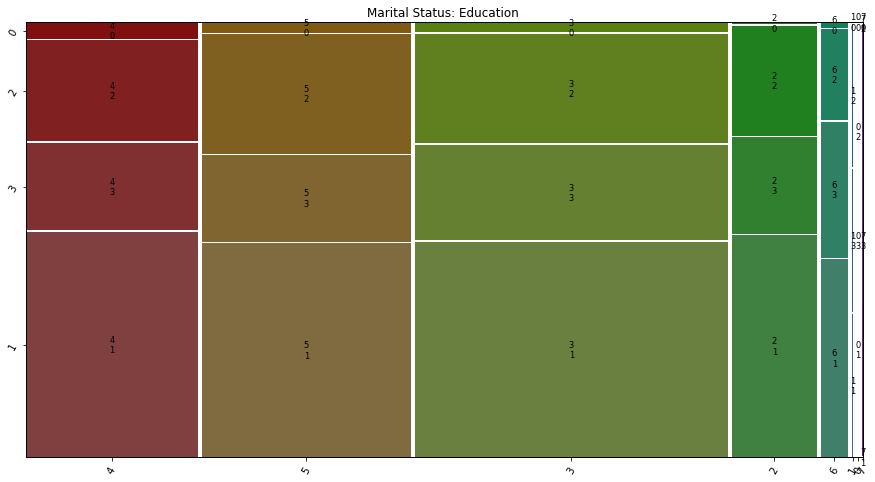

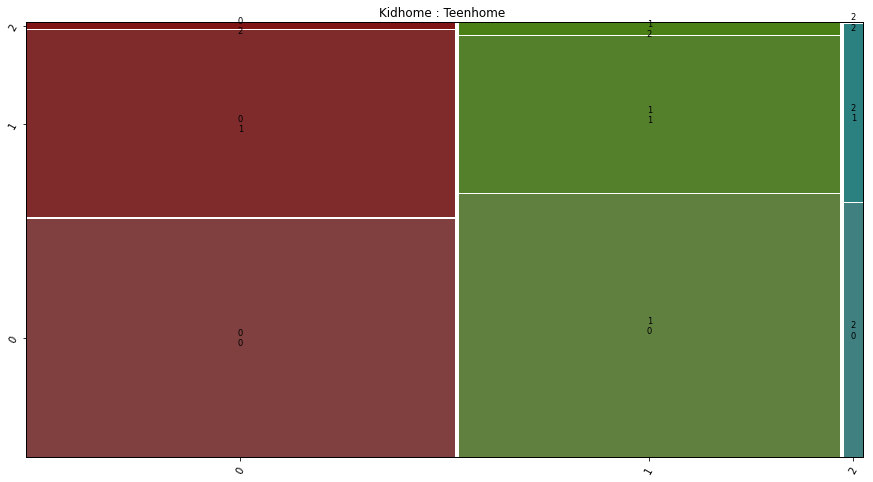

In [68]:
from statsmodels.graphics.mosaicplot import mosaic

# crosstable = pd.crosstab(cust_data['Marital_Status'], cust_data['Education'])
plt.rcParams['figure.figsize'] = (15,8)
mosaic(cust_data, ["Marital_Status", "Education"], title='Marital Status: Education ', axes_label=True, label_rotation= 60)
plt.show()


mosaic(cust_data, ["Teenhome", "Kidhome"], title='Kidhome : Teenhome ', axes_label=True, label_rotation= 60)
plt.show()


In [69]:
# from statsmodels.graphics.mosaicplot import mosaic

# plt.rcParams['figure.figsize'] = (15, 12)
# plt.style.use('ggplot')

# data = pd.DataFrame({'Marital_Status': Marital_Status, 'Education': Education})

# mosaic(data,  ['Marital_Status', 'Education'])
# plt.show()

In [70]:
# data_num=cust_data.select_dtypes(include=["int64", "float64"])

# #define length of axis
# cross= data_num.iloc[:,[6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,25]]

# plt.figure(figsize=(20,45))

# for i, col in enumerate(cross):
#     plt.subplot(9,2,i+1)
#     sns.pointplot(x=cust_data["Education"],
#                 y =cross[col],
#                 hue=cust_data["Marital_Status"],
#                 data=cross);

    
# plt.tight_layout()

In [71]:
#parallel set plot
import plotly.express as px

dfff= cust_data_preprocessed[['Marital_Status', 'Education', 'Response']]
fig = px.parallel_categories(dfff, dimensions=['Marital_Status', 'Education'],
                            color='Response', color_continuous_scale=px.colors.sequential.Inferno,
                            labels={'Marital_Status': 'Marital Status', 'Education': 'Response:Education'})
fig.show()

dfff2= cust_data_preprocessed[['Kidhome', 'Teenhome', 'Response']]
fig = px.parallel_categories(dfff2, dimensions=['Kidhome', 'Teenhome'],
                            color='Response', color_continuous_scale=px.colors.sequential.Inferno,
                            labels={'Kidhome': 'Kidhome', 'Teenhome': 'Response:Teenhome'})
fig.show()

Insight: By empirical observation on the mosaic plots above, we know that:
- The `Response` rate for "Married" with "Graduation" is generally more than "Single", "Divorced" amd "Widow" with other education.
- The probability of accepting offer is relatively higher for customer with no child and teenagers(located at the highest yellow box) represents the conditional probability of accepting the offer given that the customer does not have child and teenager in his / her household. 

### Violin Plots / Grouped box-plots

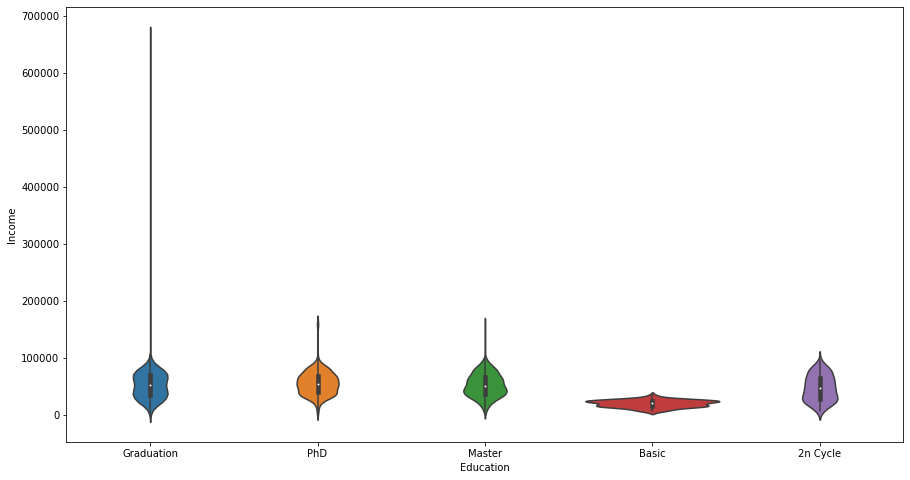

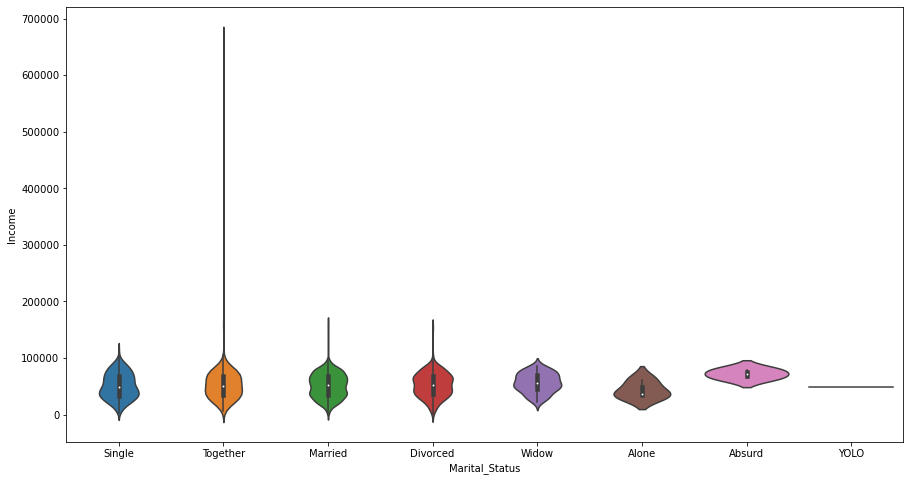

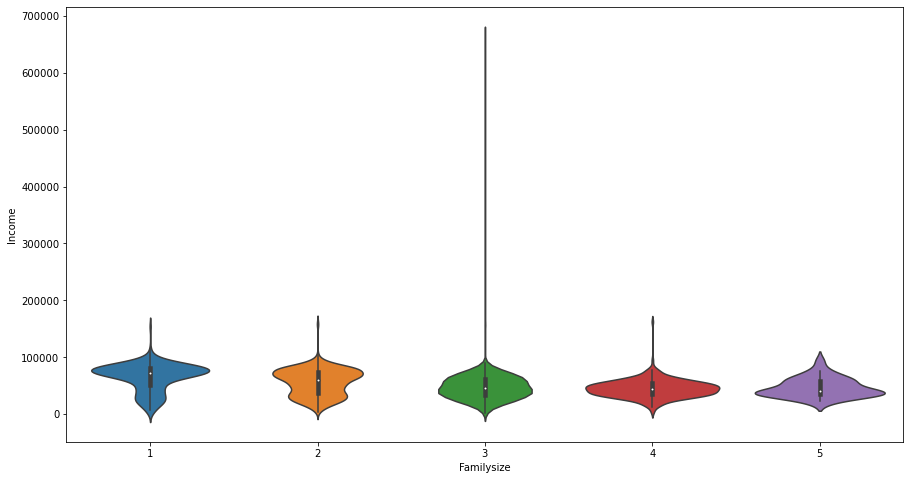

In [96]:
# violin plots
sns.violinplot(x=cust_data_preprocessed['Education'], y=cust_data['Income'])
plt.show()
sns.violinplot(x=cust_data_preprocessed['Marital_Status'], y=cust_data['Income'])
plt.show()

sns.violinplot(x=cust_data['Familysize'], y=cust_data['Income'])
plt.show()


Insight: 
According to the above violin plots:
- Income for “Basic” education level is generally lower in contrast to other education levels.
- Similar income for all marital statuses.
- Customer with smaller household size has higher annual household income. (higher probabilities)

Grouped box plots are used to visualize the distribution of amount spent on different types of products for customers who belongs to different educational backgrounds, marital statuses and household size.

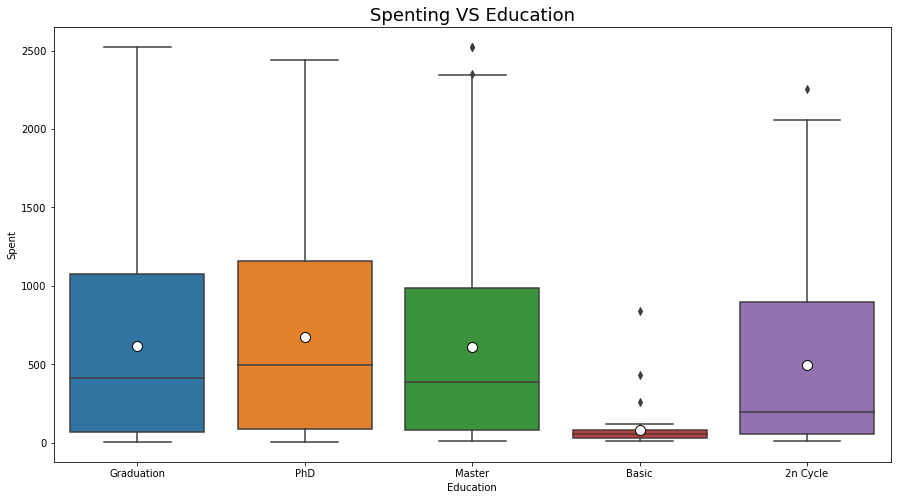

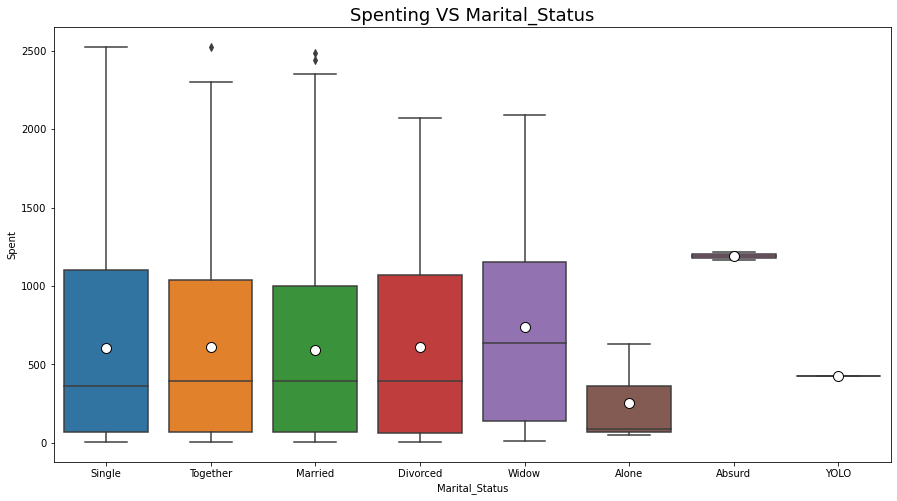

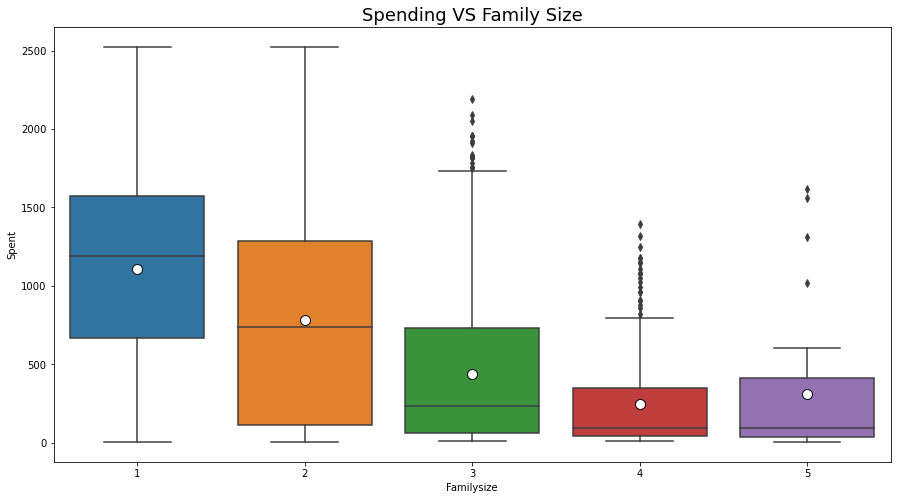

In [109]:
#box plot
# i use white color on the mean due to present duplication color with the median line
sns.boxplot( x=cust_data_preprocessed['Education'], y=cust_data['Spent'], showmeans = True, 
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.title("Spenting VS Education", size=18)
plt.show()
sns.boxplot( x=cust_data_preprocessed['Marital_Status'], y=cust_data['Spent'], showmeans = True, 
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.title("Spenting VS Marital_Status", size=18)
plt.show()
sns.boxplot( x=cust_data['Familysize'], y=cust_data['Spent'], showmeans = True, 
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.title("Spending VS Family Size", size=18)
plt.show()

Lets look at the top grouped box plots. The notch of the PhD boxplot does not overlap with other notches, indicating that the median of amount spent on wine for customer with Phd academic qualification is statistically different from other customers of lower education level. The white dots which represent the mean for different groups also show a higher amount spent on wines for PhD customers. Based on the bottom grouped box plots, the amount spent is lower for larger household size across all product types.